## Importing the essential libraries over here

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import numpy as np
pd.set_option('display.float_format', '{:.6f}'.format)
pd.set_option('display.float_format', lambda x: "{:.6f}".format(x) if not pd.isna(x) else "NaN")

## Importing the dataset over here

In [9]:
data=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [10]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.000000,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.000000,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011500.000000
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.000000,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.000000,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,53067011100.000000
2,5YJSA1E22H,Thurston,Lacey,WA,98516.000000,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.000000,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,53067012226.000000
3,1C4JJXP62M,Thurston,Tenino,WA,98589.000000,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.000000,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,53067012620.000000
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.000000,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.000000,225996361,POINT (-120.524012 46.5973939),PACIFICORP,53077000800.000000


## Taking care of duplicate observations if present over here

In [11]:
data.duplicated().sum()

0

## Taking care of missing values if present over here

In [12]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [13]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

County
City
Postal Code
Legislative District
Vehicle Location
Electric Utility
2020 Census Tract


In [14]:
data[missing_values]

,County,City,Postal Code,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
0,King,Seattle,98126.000000,34.000000,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011500.000000
1,Thurston,Olympia,98502.000000,22.000000,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,53067011100.000000
2,Thurston,Lacey,98516.000000,22.000000,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,53067012226.000000
3,Thurston,Tenino,98589.000000,20.000000,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,53067012620.000000
4,Yakima,Yakima,98902.000000,14.000000,POINT (-120.524012 46.5973939),PACIFICORP,53077000800.000000
...,...,...,...,...,...,...,...
181453,Douglas,East Wenatchee,98802.000000,12.000000,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,53017950400.000000
181454,Spokane,Spokane Valley,99206.000000,4.000000,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,53063012402.000000
181455,King,Enumclaw,98022.000000,31.000000,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031302.000000
181456,Clark,Vancouver,98682.000000,18.000000,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040604.000000


In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

## Filtering all the numerical features over here

In [17]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
for feature in numerical_features:
  print(feature)

Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
2020 Census Tract


In [18]:
data[numerical_features]

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98126.000000,2017,16,0,34.000000,235085336,53033011500.000000
1,98502.000000,2018,16,0,22.000000,237896795,53067011100.000000
2,98516.000000,2017,210,0,22.000000,154498865,53067012226.000000
3,98589.000000,2021,25,0,20.000000,154525493,53067012620.000000
4,98902.000000,2020,308,0,14.000000,225996361,53077000800.000000
...,...,...,...,...,...,...,...
181453,98802.000000,2023,0,0,12.000000,244207316,53017950400.000000
181454,99206.000000,2022,21,0,4.000000,207180774,53063012402.000000
181455,98022.000000,2021,0,0,31.000000,161934202,53033031302.000000
181456,98682.000000,2020,308,0,18.000000,100859650,53011040604.000000


## Filtering all the categorical features over here

In [20]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
for feature in cat_features:
  print(feature)

VIN (1-10)
County
City
State
Make
Model
Electric Vehicle Type
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Vehicle Location
Electric Utility


In [21]:
data[cat_features]

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,WAUTPBFF4H,King,Seattle,WA,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,WAUUPBFF2J,Thurston,Olympia,WA,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC
2,5YJSA1E22H,Thurston,Lacey,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC
3,1C4JJXP62M,Thurston,Tenino,WA,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC
4,5YJ3E1EC9L,Yakima,Yakima,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-120.524012 46.5973939),PACIFICORP
...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...
181455,5YJ3E1EA0M,King,Enumclaw,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
181456,5YJ3E1EC8L,Clark,Vancouver,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...


## Encoding all the categorical features into numerical values over here

In [22]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [23]:
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,0,0,0,0,98126.000000,2017,0,0,0,0,16,0,34.000000,235085336,0,0,53033011500.000000
1,1,1,1,0,98502.000000,2018,0,0,0,0,16,0,22.000000,237896795,1,1,53067011100.000000
2,2,1,2,0,98516.000000,2017,1,1,1,1,210,0,22.000000,154498865,2,1,53067012226.000000
3,3,1,3,0,98589.000000,2021,2,2,0,0,25,0,20.000000,154525493,3,1,53067012620.000000
4,4,2,4,0,98902.000000,2020,1,3,1,1,308,0,14.000000,225996361,4,2,53077000800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,3377,20,148,0,98802.000000,2023,28,72,1,2,0,0,12.000000,244207316,212,25,53017950400.000000
181454,3241,22,163,0,99206.000000,2022,2,2,0,0,21,0,4.000000,207180774,232,27,53063012402.000000
181455,901,0,32,0,98022.000000,2021,1,3,1,2,0,0,31.000000,161934202,52,4,53033031302.000000
181456,1882,12,39,0,98682.000000,2020,1,3,1,1,308,0,18.000000,100859650,103,7,53011040604.000000


In [24]:
data['MAKE']=data['Make']

In [25]:
data.drop('Make',axis=1,inplace=True)

## Creating the features and labels over here

In [26]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Trainnig the model on the training set over here

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

## Evaluating the performance of the model on the testing dataset over here

In [32]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 5  5]
 [ 1  1]
 [ 1  1]
 ...
 [ 1  1]
 [30 30]
 [ 1  1]]


## Displaying the performance metrics and all over here

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[  708     7     0 ...     0     0     0]
 [    0 16064     0 ...     0     0     0]
 [    0     0   912 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0    21     0]
 [    0     0     0 ...     0     0     1]]


0.9927922454502776

<Axes: >

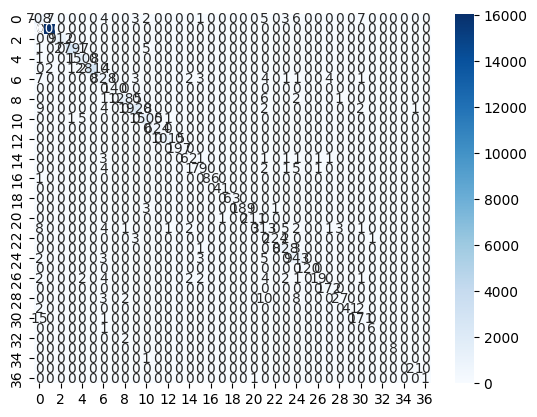

In [34]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')